In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
# convert to npy
convert = False
if convert:
    X_train, y_train = load_mnist('data/fashion', kind='train')
    X_test, y_test = load_mnist('data/fashion', kind='t10k')
    np.save('data/fashion/X_train.npy', X_train)
    np.save('data/fashion/y_train.npy', y_train)
    np.save('data/fashion/X_test.npy', X_test)
    np.save('data/fashion/y_test.npy', y_test)

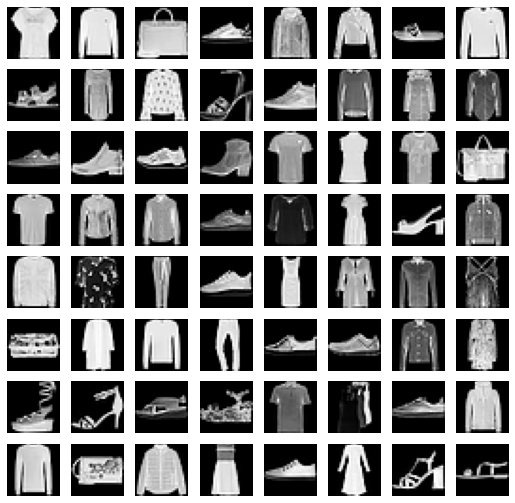

In [83]:
# Data Preparation
X_train = np.load('/content/drive/MyDrive/data/fashion/X_train.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/data/fashion/y_train.npy', allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/data/fashion/X_test.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/data/fashion/y_test.npy', allow_pickle=True)

# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 60.000 phần tử
indices = list(np.random.randint(60000, size=64))

fig = plt.figure(figsize=(9,9))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [80]:
X_train = X_train/255
X_test  = X_test/255


batch_size = 256
epochs = 100

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation='relu', 
                               kernel_initializer=keras.initializers.HeNormal(),
                               bias_initializer=keras.initializers.Zeros()))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(32, activation='relu', 
                               kernel_initializer=keras.initializers.HeNormal(),
                               bias_initializer=keras.initializers.Zeros()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax', 
                               kernel_initializer=keras.initializers.HeNormal(),
                               bias_initializer=keras.initializers.Zeros()))

# declare optimization method and loss function
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.002), 
              loss='sparse_categorical_crossentropy', 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# training
history = model.fit(X_train, y_train, batch_size, epochs, validation_split=0.1)

# testing
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('\n\nTest accuracy:', test_acc)

Epoch 1/100
211/211 [==============================] - 2s 6ms/step - loss: 1.1121 - sparse_categorical_accuracy: 0.6329 - val_loss: 0.4921 - val_sparse_categorical_accuracy: 0.8268
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.5659 - sparse_categorical_accuracy: 0.8006 - val_loss: 0.4080 - val_sparse_categorical_accuracy: 0.8545
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.5076 - sparse_categorical_accuracy: 0.8196 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.8600
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4758 - sparse_categorical_accuracy: 0.8269 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.8602
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4542 - sparse_categorical_accuracy: 0.8364 - val_loss: 0.3563 - val_sparse_categorical_accuracy: 0.8650
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.4487 - sparse_cate

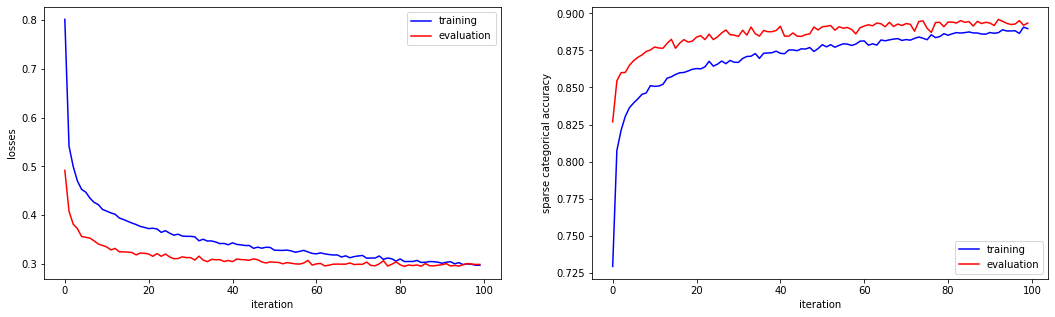

In [81]:
# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()

In [84]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_150 (Bat (None, 784)               3136      
_________________________________________________________________
dense_173 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_116 (Dropout)        (None, 256)               0         
_________________________________________________________________
batch_normalization_151 (Bat (None, 256)               1024      
_________________________________________________________________
dense_174 (Dense)            (None, 32)                8224      
_________________________________________________________________
batch_normalization_152 (Bat (None, 32)                128       
_________________________________________________________________
dense_175 (Dense)            (None, 10)              